In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [33]:
df=pd.read_csv("C:\\NARESH IT VIDS\\New folder\\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
#dataset understanding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#data understanding

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.drop(columns=["CustomerID","Genre","Age"],inplace = True)

In [42]:
df.rename(columns={"Annual Income (k$)":"Income",
                 "Spending Score (1-100) ":"Score"},inplace=True)

In [43]:
df.head()

,Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


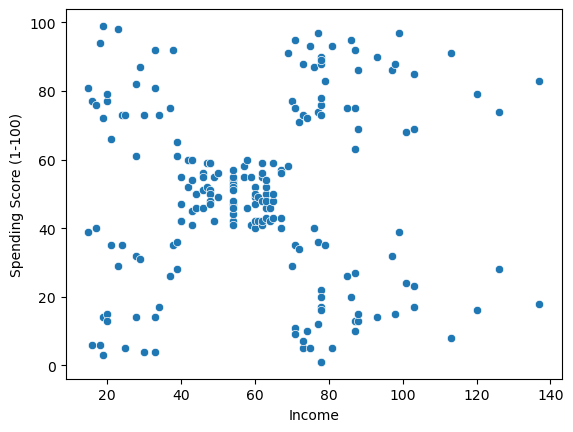

In [45]:
sns.scatterplot(x="Income",y="Spending Score (1-100)",data=df)
plt.show()

for unsupervised ML,there is no output data

In [41]:
x=df
x

,Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# 1.KMeans Clustering


find the optimal number of clusters: "Elbow Curve"

In [23]:
wcss=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters =k,init="k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

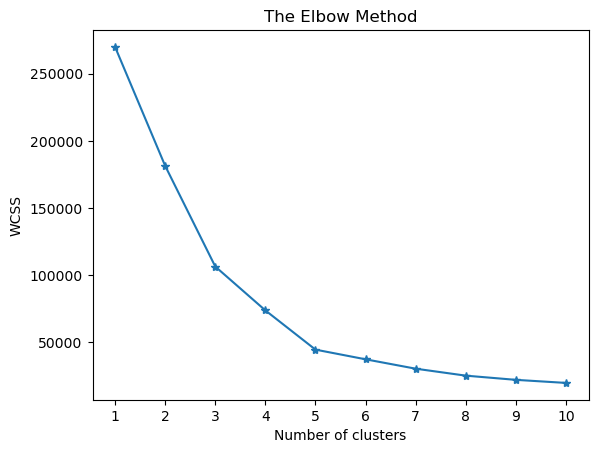

In [24]:
#using the elbow method

plt.plot(range(1,11),wcss,marker="*")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [48]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters =5,init="k-means++",random_state=True)

#fit & predict

x["km_cluster"]=kmeans.fit_predict(x)


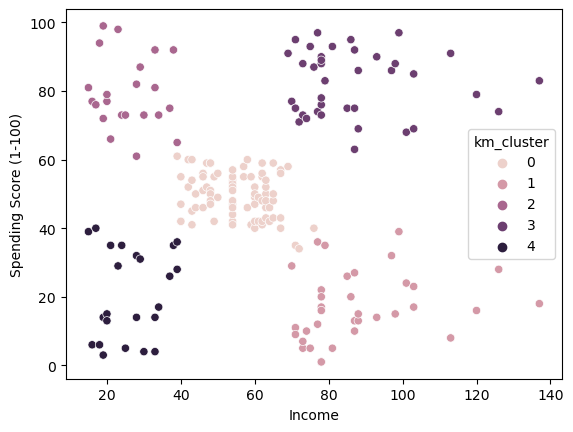

In [50]:
sns.scatterplot(x="Income",y="Spending Score (1-100)",hue="km_cluster",data=x)
plt.show()

#  2.Hierarchial Clustering
    
    identifying the optimal number of clusters using Dendogram

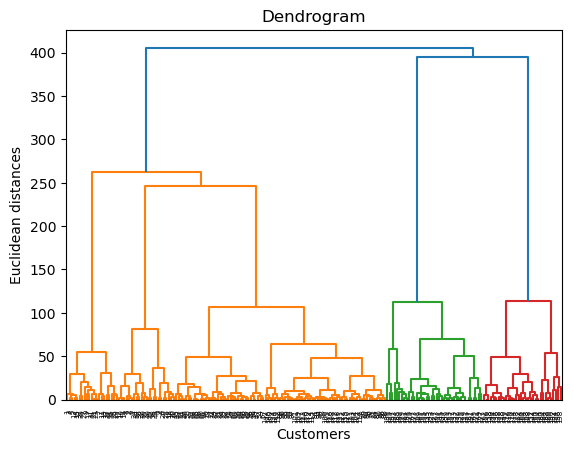

In [52]:
import scipy.cluster.hierarchy as sch
data= sch.linkage(x,method="ward")

dendrogram=sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

Hierarchial Clustering Model

In [55]:
from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters= 5, affinity= "euclidean")

#fit & predict

x["h_cluster"]= hc.fit_predict(x)

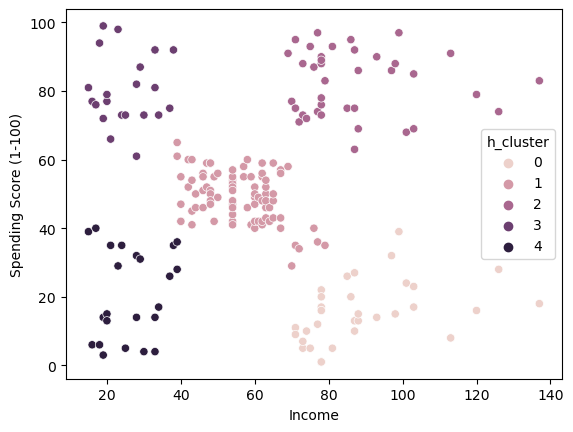

In [56]:
sns.scatterplot(x="Income",y="Spending Score (1-100)",hue= "h_cluster",data=x)
plt.show()

# 3.DBSCAN Clustering


In [63]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs= DBSCAN(eps=r, min_samples=m)
        x["db_cluster"]= dbs.fit_predict(x)
        
    if x["db_cluster"].nunique()==5:
        break
        
print("eps:",r)
print("min:",m)

eps: 8
min: 9


In [64]:
from sklearn.cluster import DBSCAN

dbs= DBSCAN(eps=8,min_samples=9)

x["db_cluster"]=dbs.fit_predict(x)

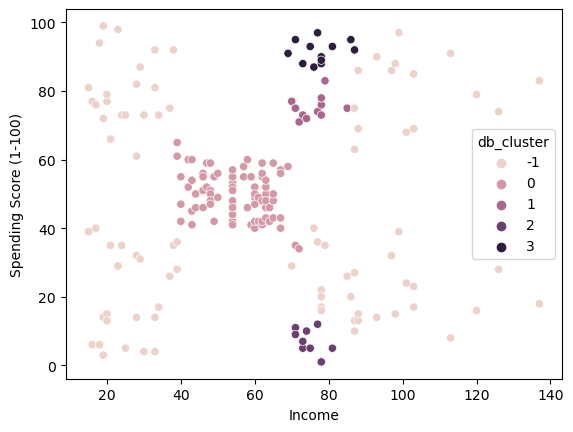

In [66]:
sns.scatterplot(x="Income",y="Spending Score (1-100)",hue="db_cluster",data=x)
plt.show()